### 앙상블(Ensemble) : 결정트리 기반 알고리즘 결합하여 구현
[앙상블 종류 요약]

* (1) Voting : 서로 다른 알고리즘 가진 분류기를 결합, 사이킷런은 VotingClassifier 클래스를 제공함

 <1> 하드보팅(Hard Voting) : 분류기들이 예측한 결과 값을 다수결로 결정

 <2> 소프트 보팅(Soft Voting) : 각 분류기들이 예측값을 확률로 구하면 이를 평균 내어 확률이 가장 높은 값을 결과 값으로 결정


* (2) Bagging : 같은 유형의 알고리즘을 결합, 데이터 샘플링시 서로 다르게 가져가면서 학습, RandomForest 가 대표적, Bootstrapping Aggregation 줄임말

  (Bootstrapping : 여러개의 데이터 세트를 중첩되게 분리하는 분할 방식)


* (3) Boosting : 여러개의 분류기가 순차적으로 학습하면서 가중치를 부스팅한다, XGBoost(캐글 대회 상위 석권),LightGBM


* (4) Stacking 기법 : 위의 여러개의 개별적 모델을 학습하여 예측한 데이터 세트를 사용하여 최종 메타 모델이 학습 예측



### Bagging

### 랜덤포레스트(RandomForest)
- 의사 결정 트리 기반(Decision Tree) 기반 분류 알고리즘
- 앙상블(Ensemble), 같은 결정트리를 여러개 사용, 비교적 빠른 수행
- 현재의 랜덤 포레스트의 개념은 레오 브레이먼(Leo Breimen)의 논문에서 만들어짐, 이 논문은 랜덤 노드 최적화(Randomized Node Optimization,RNO)와 배깅(bagging)을 결합한 방법과 같은 CART(Classification And Regression Tree)를 사용해 상관관계가 없는 트리들로 포레스트를 구성하는 방법을 제시했다



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
'RandomForestClassifier() 파라메터 설명'
# RandomForestClassifier(
#     n_estimators=100, (결정트리의 갯수, default=100, 많을 수록 좋은 성능을 기대할수 있지만 속도가 느려진다)
#     criterion='gini',
#     max_depth=None,   (트리의 최대 깊이, 결정트리의 파라메터와 동일)
#     min_samples_split=2,(노드를 분할하기 위한 최소한의 샘플 수,default=2,과적합 제어에 사용,결정트리의 파라메터와 동일)
#     min_samples_leaf=1,(leaf 노드가 되기 위한 최소한의 샘플 수,default=1,결정트리의 파라메터와 동일)
#     min_weight_fraction_leaf=0.0,
#     max_features='auto', (최적의 분할을 위해 고려할 최대 피쳐 갯수,결정트리의 파라메터와 동일)
#     max_leaf_nodes=None, (리프노드의 최대 갯수, 결정트리의 파라메터와 동일)
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,      (병렬처리 CPU의 갯수, -1이면 전체 CPU 모두 사용)
#     random_state=None,(랜덤 seed 설정 값)
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
# )


'RandomForestClassifier() 파라메터 설명'

In [48]:
# RandomForestClassifier 예제 : binary classification(2진 분류, 0 or 1)
np.random.seed(10)


# mushroom 데이터 셋 읽어오기

mr = pd.read_csv('mushroom.csv',header=None)
mr
mr.iloc[:,0].value_counts() # 레이블의 분포, e:4208 , p:3916

# 데이터의 내부의 기호를 숫자로 변환하기
data = []   # X
label = []  # Y

for row_index,row in mr.iterrows(): # 8124 회 반복
# row_index : 0 , row : [] < Series>
    label.append(row.iloc[0])   # Y 값은 문자로 저장
    
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))
    data.append(row_data)
    
    
# 방법 2  : 장시간 소요
# for j in range(8124):
#     for i in range(22):
#         mr.iloc[j,i+1] = ord(mr.iloc[j,i+1])
        
    
# train(학습)과 test(검증) 데이터로 나누기 :
X_train,X_test,y_train,y_test = train_test_split(data,label) # 75% : 25%
print(len(X_train),len(X_test),len(y_train),len(y_test))

# 학습
clf = RandomForestClassifier(n_estimators=100,random_state=10,n_jobs=-1)
clf.fit(X_train,y_train)

# 예측
pred = clf.predict(X_test)
# y_test,pred

# 정확도 측정
ac_score = metrics.accuracy_score(y_test,pred)
print('정확도:',ac_score)   

cl_report = metrics.classification_report(y_test,pred)
print('리포트:\n',cl_report)

6093 2031 6093 2031
정확도: 1.0
리포트:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1072
           p       1.00      1.00      1.00       959

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



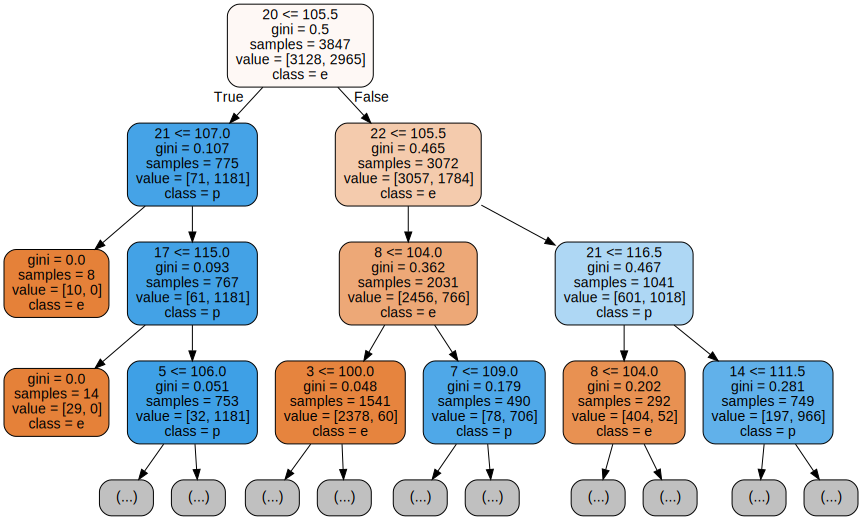

In [49]:

# fit()으로 학습시 생성된 tree를 graphviz로 출력 시각화

# print(clf.estimators_)  # 같은 결정트리가 100개 생성 되어 있음

from sklearn.tree import export_graphviz

estimator = clf.estimators_[9] # 100개의 결정트리 중에서 10번째 트리

export_graphviz(estimator,out_file='mushroom.dot',
                class_names=np.array(['e','p']),
                feature_names = list(mr.columns[1:]),max_depth=3,
                impurity=True,filled=True,rounded=True)

import graphviz
f = open('mushroom.dot')
dot_graph = f.read()
graphviz.Source(dot_graph)

### 평가 지표(2진 분류)
* 정확도(Accuracy)
* 오차행렬(confusion Matrix)
* 정밀도(Precison)
* 재현율(Recall)
* F1 스코어
* ROC AUC


### 오차 행렬(confusion Matrix)
* True: 맞음, False: 틀림
* Negative : 0 , Positive : 1

[ [ TN, FP], True Negative, False Positive
<br>
  [ FN, TP] ] False Negative, True Positive
  
정확도 = 맞은갯수/전체갯수 = (TN + TP)/( TN + FP + FN + TP) 


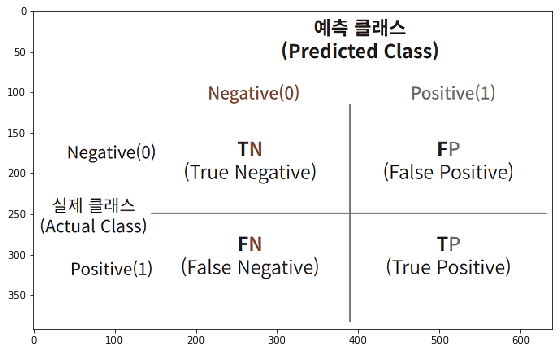

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(6.4*1.5,3.9*1.5))
img = mpimg.imread('오차행렬.bmp')
plt.grid(False)
plt.imshow(img)
plt.show()


#### 정밀도 = TP/(FP + TP), 예측을  Positive로 한 것 중 Positive답을 맞춘 비율, 양성 예측도
#### 재현율 = TP/(FN + TP), 실제 값이 Positive인 것 중 Positive답을 맞춘 비율, 민감도, TPR(True Positive Rate)
#### F1 스코어  = 2/((1/재현율) + (1/정밀도)), feature의 중요도, 정밀도와 재현율을 결합한 지표
#### ROC(Receiver Operation Curve) : 수신자 판단 곡선
* TNR(True Negative Rate,특이성) : TN/(FP + TN)
* x축을 FPR(False Positive Rate) : FP/(FP + TN) = 1 - TNR
* y축을 TPR(True Positive Rate,재현율,민감도) : TP/(FN + TP)

####  ROC AUC(Area Under Curve) : ROC 곡선의 면적, 1에 가까울수록 좋음, 1이 최대


In [78]:
# 정확도 평가(평가 지표) 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import classification_report

def get_clf_eval(y_test,pred):   # 평가 지표를 구하는 함수
    accuracy = accuracy_score(y_test,pred)
    print('정확도:',accuracy)

    # 오차 행렬
    confusion = confusion_matrix(y_test,pred)
    print('오차행렬:\n',confusion)
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]

    # 정밀도
    precision = precision_score(y_test,pred)
    print('정밀도:',precision)
    print('TP/(FP + TP):',TP/(FP + TP))

    # 재현율
    recall = recall_score(y_test,pred)
    print('재현율:',recall)
    print('TP/(FN + TP):',TP/(FN + TP))
    
    # f1_score
    f1 = f1_score(y_test,pred)
    print('F1-스코어:',f1)
    print(2/((1/recall) + (1/precision)))
    print(2*recall*precision/(recall+precision))

    # roc_auc
    roc_auc = roc_auc_score(y_test,pred)
    print('roc_auc:',roc_auc)

In [ ]:
# labelEncoder를 사용하여 인코딩

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_test_enc = encoder.fit_transform(y_test)
print('y_test 인코딩 변환값:',y_test_enc)

pred_enc = encoder.fit_transform(pred)
print('pred 인코딩 변환값:',pred_enc)

### Boosting
 여러 개의 약한 학습기(분류기)가 순차적으로 학습,예측 하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가는 학습 방법<br>
XGBoost(Kaggle 대회 상위 석권), LightGBM(속도 빠름)
* (1) AdaBoost(Adaptive Boosting) : 개별 약한 학습기에 순차적으로 가중치를 부여해 결합하여 예측
* (2) GBM(Gradient Boost Machine) : 에이다 부스트와 유사하나 가중치를 경사하강법(Gradient Descent)을 사용하여 구한다

 https://roytravel.tistory.com/52


### XGBoost (eXtra Gradient Boost)
:일반 GBM보다 속도가 빠름, 자체 과적합 규제 기능으로 과적합에 강하다.
<br>
Tree Pruning(나무 가지치기)으로 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임
<br>
Early Stopping(조기 중단) 기능으로 오차가 줄지 않을 경우 실제 estimators 갯수만큼 학습하지 않고 학습을 중단
<br>
원래는 C/C++ 용 라이브러리인데 XGBoost 개발 그룹에서 나중에 파이썬용 사이킷런용 제공

* (1) 파이썬 래퍼 XGBoost : xgboost ( DMatrix 객체 사용, train()/predict() 함수)
* (2) 사이킷런 래퍼 XGBoost : XGBoostClassifier, XGBoostRegressor ( fit()/predict() 함수)


In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier # 일반 GBM

### (1) 파이썬 XGBoost

In [ ]:
# xgboost 모듈설치 : pip install xgboost
# ! pip install xgboost

import xgboost as xgb
from xgboost import plot_importance

print(xgb.__version__)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Breast Cancer Wisconsin
dataset = load_breast_cancer()
type(dataset)  # Bunch

dataset.data.shape  # (569, 30)
dataset.target.shape # (569,), 0 : ,악성(malignant), 1: 양성(benign)

x_features = dataset.data #  X , 피쳐
y_label = dataset.target  #  Y , 레이블

cancer_df = pd.DataFrame(data = x_features,columns=dataset.feature_names)
cancer_df

In [ ]:
print(dataset.target_names)
print(cancer_df['target'])

In [55]:
# train(80%):test(20%) 로 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(x_features,y_label,
                                                test_size=0.2,
                                                random_state=0)
X_train.shape   # (455, 30)
X_test.shape    # (114, 30)
type(X_train)

numpy.ndarray

In [56]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)
type(dtrain)

In [59]:
params = {  'max_depth':3,        # 트리의 최대 깊이
            'eta' : 0.1,          # 학습율(--> learning_rate)
            'objective':'binary:logistic',  # 2진 분류 , 3개 이상 분류는 multi:softmax
            'eval_metric':'logloss',       # 손실함수
#             'early_stoppings' : 100
}

num_round = 400


In [61]:
wlist = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params,dtrain=dtrain,
                     num_boost_round=num_round,evals=wlist)

[0]	train-logloss:0.61167	eval-logloss:0.61369
[1]	train-logloss:0.54435	eval-logloss:0.54543
[2]	train-logloss:0.48615	eval-logloss:0.48902
[3]	train-logloss:0.43809	eval-logloss:0.44035
[4]	train-logloss:0.39412	eval-logloss:0.39958
[5]	train-logloss:0.35626	eval-logloss:0.36435
[6]	train-logloss:0.32515	eval-logloss:0.33274
[7]	train-logloss:0.29562	eval-logloss:0.30601
[8]	train-logloss:0.26978	eval-logloss:0.28281
[9]	train-logloss:0.24725	eval-logloss:0.26186
[10]	train-logloss:0.22772	eval-logloss:0.24381
[11]	train-logloss:0.21015	eval-logloss:0.22700
[12]	train-logloss:0.19444	eval-logloss:0.21309
[13]	train-logloss:0.18053	eval-logloss:0.20019
[14]	train-logloss:0.16696	eval-logloss:0.18700
[15]	train-logloss:0.15556	eval-logloss:0.17661
[16]	train-logloss:0.14462	eval-logloss:0.16734
[17]	train-logloss:0.13520	eval-logloss:0.15739
[18]	train-logloss:0.12608	eval-logloss:0.15021
[19]	train-logloss:0.11848	eval-logloss:0.14276
[20]	train-logloss:0.11117	eval-logloss:0.13605
[2

[170]	train-logloss:0.00770	eval-logloss:0.04831
[171]	train-logloss:0.00768	eval-logloss:0.04815
[172]	train-logloss:0.00767	eval-logloss:0.04827
[173]	train-logloss:0.00762	eval-logloss:0.04839
[174]	train-logloss:0.00760	eval-logloss:0.04823
[175]	train-logloss:0.00759	eval-logloss:0.04830
[176]	train-logloss:0.00756	eval-logloss:0.04843
[177]	train-logloss:0.00754	eval-logloss:0.04845
[178]	train-logloss:0.00749	eval-logloss:0.04862
[179]	train-logloss:0.00748	eval-logloss:0.04846
[180]	train-logloss:0.00746	eval-logloss:0.04851
[181]	train-logloss:0.00745	eval-logloss:0.04847
[182]	train-logloss:0.00743	eval-logloss:0.04870
[183]	train-logloss:0.00741	eval-logloss:0.04860
[184]	train-logloss:0.00737	eval-logloss:0.04829
[185]	train-logloss:0.00735	eval-logloss:0.04834
[186]	train-logloss:0.00734	eval-logloss:0.04836
[187]	train-logloss:0.00732	eval-logloss:0.04822
[188]	train-logloss:0.00730	eval-logloss:0.04826
[189]	train-logloss:0.00729	eval-logloss:0.04834
[190]	train-logloss:

[338]	train-logloss:0.00580	eval-logloss:0.04481
[339]	train-logloss:0.00580	eval-logloss:0.04486
[340]	train-logloss:0.00579	eval-logloss:0.04485
[341]	train-logloss:0.00578	eval-logloss:0.04469
[342]	train-logloss:0.00578	eval-logloss:0.04473
[343]	train-logloss:0.00577	eval-logloss:0.04478
[344]	train-logloss:0.00576	eval-logloss:0.04471
[345]	train-logloss:0.00576	eval-logloss:0.04462
[346]	train-logloss:0.00575	eval-logloss:0.04468
[347]	train-logloss:0.00574	eval-logloss:0.04453
[348]	train-logloss:0.00574	eval-logloss:0.04458
[349]	train-logloss:0.00573	eval-logloss:0.04462
[350]	train-logloss:0.00573	eval-logloss:0.04467
[351]	train-logloss:0.00572	eval-logloss:0.04472
[352]	train-logloss:0.00571	eval-logloss:0.04466
[353]	train-logloss:0.00571	eval-logloss:0.04478
[354]	train-logloss:0.00570	eval-logloss:0.04457
[355]	train-logloss:0.00569	eval-logloss:0.04450
[356]	train-logloss:0.00569	eval-logloss:0.04457
[357]	train-logloss:0.00568	eval-logloss:0.04441
[358]	train-logloss:

In [80]:
# predict() 함수를 사용하여 예측
pred_probs = xgb_model.predict(dtest)   # 0 ~ 1 사이의 값이 얻어짐
# print(np.round(pred_probs))    # 반올림

pred = [1 if x>0.9 else 0 for x in pred_probs]
pred[:24]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [81]:
# 정확도 평가
get_clf_eval(y_test,pred)

정확도: 0.956140350877193
오차행렬:
 [[47  0]
 [ 5 62]]
정밀도: 1.0
TP/(FP + TP): 1.0
재현율: 0.9253731343283582
TP/(FN + TP): 0.9253731343283582
F1-스코어: 0.9612403100775194
0.9612403100775194
0.9612403100775194
roc_auc: 0.9626865671641791


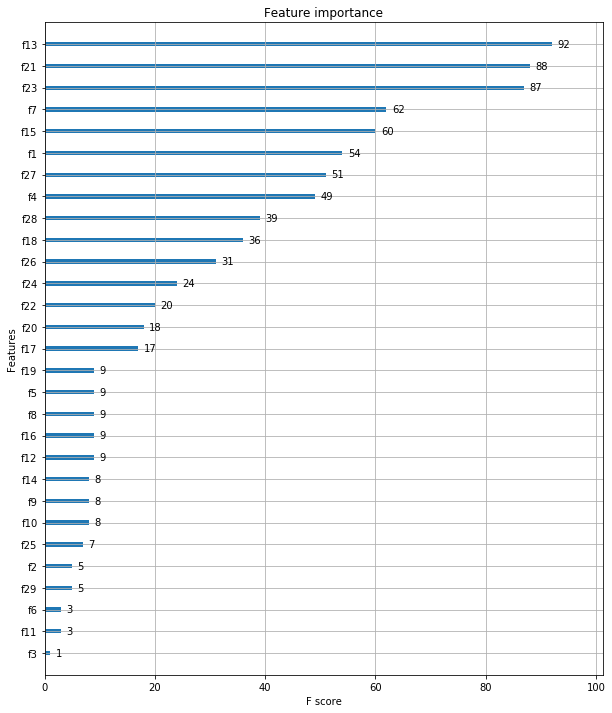

In [82]:
# feature importance 를 그래프로 출력
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

### (2) 사이킷런 Wrapper XGBoost 개요 및 적용
* XGBoostClassifier
* XGBoostRegressor


In [89]:
' XGBoostClassifier 의 하이퍼 파라메터 설명 '

# XGBoostClassifier(
#     max_depth=3,          (트리의 최대 깊이, 결정 트리의 파라메터와 동일) 
#     learning_rate=0.1,    (학습율, default = 0.1, 0과 1사이의 값으로 설정, 보통 0.01~0.2 사이, 파이썬 래퍼에서는 eta)
#     n_estimators=100,     (결정 트리의 갯수 ,default = 100) 
#     verbosity=1,          (출력 메세지 조정, 0이면 silent 와 동일 , 3 은 debug)
#     silent=None,          (1로 설정하면 출력 메시지를 보여주지 않는다)
#     objective='binary:logistic', (비용함수가 이진 분류용 임을 선택함, 다중 분류용일 때는 'multi:softmax')
#     booster='gbtree',     ('gbtree'와 'gblinaer'를 선택)
#     n_jobs=1,             (병렬 CPU의 갯수, -1이면 전체 모든 CPU를 사용)
#     nthread=None,         (CPU의 쓰레드 개수 조정)
#     gamma=0,           (min_split_loss 값,리프노드를 추가적으로 나눌지를 결정할 최소 오차 감소 값, 클수록 과적합 감소효과)
#     min_child_weight=1,   (GBM의 min_child_leaf와 유사, 과적합 조절에 사용)
#     max_delta_step=0,     (class가 심하게 비대칭일 때를 제외하고 일반적으로 사용하지 않음 )
#     subsample=1, (트리가 커져서 과적합 되는것을 제어하기 위해 데이터를 샘플링 하는 비율, 0.5이면 전체 데이터의 절반을 사용,1:모두사용)
#     colsample_bytree=1,  (트리 생성에 필요한 컬럼(피처)을 임의로 샘플링하는 비율,피처가 너무 많을 경우 과적합 조정에 사용 )
#     colsample_bylevel=1, (트리 깊이 레벨 마다 샘플링하는 비율)
#     colsample_bynode=1,  (각 노드 분리(split)할 때 마다 샘플링하는 비율)
#     reg_alpha=0,         (L1 regularization 적용 값 , 과적합 감소 효과)
#     reg_lambda=1,        (L2 regularization 적용 값 , 과적합 감소 효과)
#     scale_pos_weight=1, (비대칭 클래스로 구성된 데이터셋의 균형 조정)
#     base_score=0.5,     (bias 초기 값)
#     random_state=0,   (Random number seed)
#     seed=None,        (Random number seed, 없어짐)
#     missing=None,     ( 결측치 값 ,default = None 일 경우 np.nan 으로 결측치를 자체 처리함)
#     **kwargs,
# )


# https://xgboost.readthedocs.io/en/latest/parameter.html


' XGBoostClassifier 의 하이퍼 파라메터 설명 '

In [90]:
' XGBoostClassifier 클래스의 fit함수의 파라 메터 설명 '
# xgb_wrapper.fit(
#     X,     ( feature,피쳐)
#     y,     (label, y 값)
#     sample_weight=None,
#     eval_set=None,  (Test 데이터 셋, 리스트 형태로 입력)
#     eval_metric=None, (검증에 사용되는 함수의 정의, 'rmse':회귀,'logloss':분류,'error':2진 분류)
#     early_stopping_rounds=None, ( 조기 중단 반복 횟수)
#     verbose=True, (메세지 출력)
#     xgb_model=None,
#     sample_weight_eval_set=None, (검증 데이터 셋의 가중치 리스트)
#     callbacks=None,
# )


' XGBoostClassifier 클래스의 fit함수의 파라 메터 설명 '

#### 과적합 해결을 위한 파라메터 튜닝 시 고려해 볼만한 사항
* learning_rate 값을 낮추고 반대로 n_estimators는 높여준다
* max_depth 값을 낯춘다
* min_child_weight 값을 높인다
* gamma 값을 높인다
* subsample 비율 값을 줄여본다
* colsample_bytree 비율 값을 줄여본다


In [93]:
# 사이킷런의 래퍼 : XGBoostClassifier
# early_stopping_rounds=400 : 조기중단 반복값

from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate = 0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=400,eval_set=evals,
               eval_metric='logloss',verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61369
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.54543
[2]	validation_0-logloss:0.48902
[3]	validation_0-logloss:0.44035
[4]	validation_0-logloss:0.39958
[5]	validation_0-logloss:0.36435
[6]	validation_0-logloss:0.33274
[7]	validation_0-logloss:0.30601
[8]	validation_0-logloss:0.28281
[9]	validation_0-logloss:0.26186
[10]	validation_0-logloss:0.24381
[11]	validation_0-logloss:0.22700
[12]	validation_0-logloss:0.21309
[13]	validation_0-logloss:0.20019
[14]	validation_0-logloss:0.18700
[15]	validation_0-logloss:0.17661
[16]	validation_0-logloss:0.16734
[17]	validation_0-logloss:0.15739
[18]	validation_0-logloss:0.15021
[19]	validation_0-logloss:0.14276
[20]	validation_0-logloss:0.13605
[21]	validation_0-logloss:0.13016
[22]	validation_0-logloss:0.12378
[23]	validation_0-logloss:0.11809
[24]	validation_0-logloss:0.11480
[25]	validation_0-logloss:0.11137
[26]	validation_0-logloss:0.10701
[27]	validation_0-loglo

[236]	validation_0-logloss:0.04784
[237]	validation_0-logloss:0.04790
[238]	validation_0-logloss:0.04781
[239]	validation_0-logloss:0.04791
[240]	validation_0-logloss:0.04770
[241]	validation_0-logloss:0.04773
[242]	validation_0-logloss:0.04780
[243]	validation_0-logloss:0.04769
[244]	validation_0-logloss:0.04756
[245]	validation_0-logloss:0.04751
[246]	validation_0-logloss:0.04756
[247]	validation_0-logloss:0.04736
[248]	validation_0-logloss:0.04739
[249]	validation_0-logloss:0.04745
[250]	validation_0-logloss:0.04749
[251]	validation_0-logloss:0.04754
[252]	validation_0-logloss:0.04736
[253]	validation_0-logloss:0.04726
[254]	validation_0-logloss:0.04730
[255]	validation_0-logloss:0.04710
[256]	validation_0-logloss:0.04716
[257]	validation_0-logloss:0.04720
[258]	validation_0-logloss:0.04711
[259]	validation_0-logloss:0.04714
[260]	validation_0-logloss:0.04694
[261]	validation_0-logloss:0.04700
[262]	validation_0-logloss:0.04690
[263]	validation_0-logloss:0.04695
[264]	validation_0-l

In [94]:
get_clf_eval(y_test,w_preds)

정확도: 0.9912280701754386
오차행렬:
 [[46  1]
 [ 0 67]]
정밀도: 0.9852941176470589
TP/(FP + TP): 0.9852941176470589
재현율: 1.0
TP/(FN + TP): 1.0
F1-스코어: 0.9925925925925926
0.9925925925925925
0.9925925925925926
roc_auc: 0.9893617021276595


In [95]:
# 사이킷런의 래퍼 : XGBoostClassifier
# early_stopping_rounds=10 : 조기중단 반복값

from xgboost import XGBClassifier

evals = [(X_test,y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400,learning_rate = 0.1,max_depth=3)
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=10,eval_set=evals,
               eval_metric='logloss',verbose=True)
w_preds = xgb_wrapper.predict(X_test) # 0과 1으로 예측

[0]	validation_0-logloss:0.61369
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.54543
[2]	validation_0-logloss:0.48902
[3]	validation_0-logloss:0.44035
[4]	validation_0-logloss:0.39958
[5]	validation_0-logloss:0.36435
[6]	validation_0-logloss:0.33274
[7]	validation_0-logloss:0.30601
[8]	validation_0-logloss:0.28281
[9]	validation_0-logloss:0.26186
[10]	validation_0-logloss:0.24381
[11]	validation_0-logloss:0.22700
[12]	validation_0-logloss:0.21309
[13]	validation_0-logloss:0.20019
[14]	validation_0-logloss:0.18700
[15]	validation_0-logloss:0.17661
[16]	validation_0-logloss:0.16734
[17]	validation_0-logloss:0.15739
[18]	validation_0-logloss:0.15021
[19]	validation_0-logloss:0.14276
[20]	validation_0-logloss:0.13605
[21]	validation_0-logloss:0.13016
[22]	validation_0-logloss:0.12378
[23]	validation_0-logloss:0.11809
[24]	validation_0-logloss:0.11480
[25]	validation_0-logloss:0.11137
[26]	validation_0-logloss:0.10701
[27]	validation_0-loglos

In [97]:
# 정확도
get_clf_eval(y_test,w_preds)
# early_stopping_rounds=400   --->  roc_auc: 0.9893617021276595
# early_stopping_rounds=10    --->  roc_auc: 0.971260717688155
w_preds

정확도: 0.9736842105263158
오차행렬:
 [[45  2]
 [ 1 66]]
정밀도: 0.9705882352941176
TP/(FP + TP): 0.9705882352941176
재현율: 0.9850746268656716
TP/(FN + TP): 0.9850746268656716
F1-스코어: 0.9777777777777777
0.9777777777777777
0.9777777777777777
roc_auc: 0.971260717688155


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

### LightGBM
Microsoft 사 제공 <br>
부스팅, XGBoost보다 속도가 빠르다, 메모리 사용량이 적다, 사이킷런 래퍼 제공 <br>
적은 데이터 세트에서 과적합이 발생할수 있다, 10000 이상의 데이터세트에 적당



In [98]:
' LGBMClassifier 클래스의 파라 메터 설명 '
# LGBMClassifier(
#     boosting_type='gbdt', (부스팅 타입 설정, 'gbdt': Gradient Boosting Decision Tree, 'rf', Random Forest)
#     num_leaves=31,   (하나의 트리가 가질수 있는 최대 리프 노드 갯수 )
#     max_depth=-1,    (트리의 최대 깊이 )
#     learning_rate=0.1,   (학습율)
#     n_estimators=100,    (결정 트리의 갯수)
#     subsample_for_bin=200000, ( Number of samples for constructing bins )
#     objective=None,      (손실(비용) 함수)
#     class_weight=None,
#     min_split_gain=0.0,
#     min_child_weight=0.001, (GBM의 min_child_leaf와 유사, 과적합 조절에 사용)
#     min_child_samples=20,
#     subsample=1.0,
#     subsample_freq=0,
#     colsample_bytree=1.0,
#     reg_alpha=0.0,      (L1 regularization 적용 값 , 과적합 감소 효과)
#     reg_lambda=0.0,     (L2 regularization 적용 값 , 과적합 감소 효과)
#     random_state=None,  (Random number seed)
#     n_jobs=-1,           (병렬 CPU의 갯수, -1이면 전체 모든 CPU를 사용)
#     silent=True,         (True 로 설정하면 출력 메시지를 보여주지 않는다)
#     importance_type='split',
#     **kwargs,
# )


' LGBMClassifier 클래스의 파라 메터 설명 '

In [99]:
' LGBMClassifier 클래스의 fit함수의 파라 메터 설명 '
# lgbm_wrapper.fit(
#     X,     ( feature )
#     y,     ( label )
#     sample_weight=None,   ( 학습 데이터의 가중치 )
#     init_score=None,
#     eval_set=None,   (Test 데이터 셋, 리스트 형태로 입력)
#     eval_names=None,
#     eval_sample_weight=None,
#     eval_class_weight=None,
#     eval_init_score=None,
#     eval_metric=None, (검증에 사용되는 함수의 정의, 'rmse':회귀,'logloss':분류,'error':2진 분류)
#     early_stopping_rounds=None, ( 조기 중단 반복 횟수)
#     verbose=True,          (메세지 출력)
#     feature_name='auto',
#     categorical_feature='auto',
#     callbacks=None
# )



' LGBMClassifier 클래스의 fit함수의 파라 메터 설명 '

In [101]:
# lightgbm 모듈 설치
# ! pip install lightgbm
import lightgbm
lightgbm.__version__

'2.3.1'

In [110]:
from lightgbm import LGBMClassifier

# 데이터 가져오기, split하기 : 앞 부분에 구현되어 있음

evals = [(X_test,y_test)]

lgbm_wrapper = LGBMClassifier(n_estimators=400,learning_rate=0.1,max_depth=3)
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,
                eval_metric='logloss',eval_set=evals,verbose=True)
w_preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.602613
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.536076
[3]	valid_0's binary_logloss: 0.482015
[4]	valid_0's binary_logloss: 0.435957
[5]	valid_0's binary_logloss: 0.398445
[6]	valid_0's binary_logloss: 0.366549
[7]	valid_0's binary_logloss: 0.339406
[8]	valid_0's binary_logloss: 0.31402
[9]	valid_0's binary_logloss: 0.292458
[10]	valid_0's binary_logloss: 0.26867
[11]	valid_0's binary_logloss: 0.252137
[12]	valid_0's binary_logloss: 0.232833
[13]	valid_0's binary_logloss: 0.218083
[14]	valid_0's binary_logloss: 0.202073
[15]	valid_0's binary_logloss: 0.19168
[16]	valid_0's binary_logloss: 0.181613
[17]	valid_0's binary_logloss: 0.17
[18]	valid_0's binary_logloss: 0.161977
[19]	valid_0's binary_logloss: 0.152114
[20]	valid_0's binary_logloss: 0.145962
[21]	valid_0's binary_logloss: 0.137067
[22]	valid_0's binary_logloss: 0.13196
[23]	valid_0's binary_logloss: 0.125625
[24]	valid_0's binary_logloss: 0.12

[228]	valid_0's binary_logloss: 0.0537129
[229]	valid_0's binary_logloss: 0.0538944
[230]	valid_0's binary_logloss: 0.0540122
[231]	valid_0's binary_logloss: 0.0536792
[232]	valid_0's binary_logloss: 0.0521766
[233]	valid_0's binary_logloss: 0.0519984
[234]	valid_0's binary_logloss: 0.0513908
[235]	valid_0's binary_logloss: 0.0513522
[236]	valid_0's binary_logloss: 0.0511535
[237]	valid_0's binary_logloss: 0.0514973
[238]	valid_0's binary_logloss: 0.0513848
[239]	valid_0's binary_logloss: 0.0517654
[240]	valid_0's binary_logloss: 0.0523144
[241]	valid_0's binary_logloss: 0.0517624
[242]	valid_0's binary_logloss: 0.0522959
[243]	valid_0's binary_logloss: 0.0515554
[244]	valid_0's binary_logloss: 0.0515328
[245]	valid_0's binary_logloss: 0.0511579
[246]	valid_0's binary_logloss: 0.0502722
[247]	valid_0's binary_logloss: 0.0494938
[248]	valid_0's binary_logloss: 0.049479
[249]	valid_0's binary_logloss: 0.0482521
[250]	valid_0's binary_logloss: 0.0489097
[251]	valid_0's binary_logloss: 0.0

In [111]:
# 정확도
get_clf_eval(y_test,w_preds)  # roc_auc: 0.971260717688155
# XGBoost 보다 LightGBM의 정확도가 다소 떨어짐 : 98.9% --> 97.1%
# 원인 : 데이터셋이 지나치게 적음(560개), 1만개 이상 필요


정확도: 0.9736842105263158
오차행렬:
 [[45  2]
 [ 1 66]]
정밀도: 0.9705882352941176
TP/(FP + TP): 0.9705882352941176
재현율: 0.9850746268656716
TP/(FN + TP): 0.9850746268656716
F1-스코어: 0.9777777777777777
0.9777777777777777
0.9777777777777777
roc_auc: 0.971260717688155


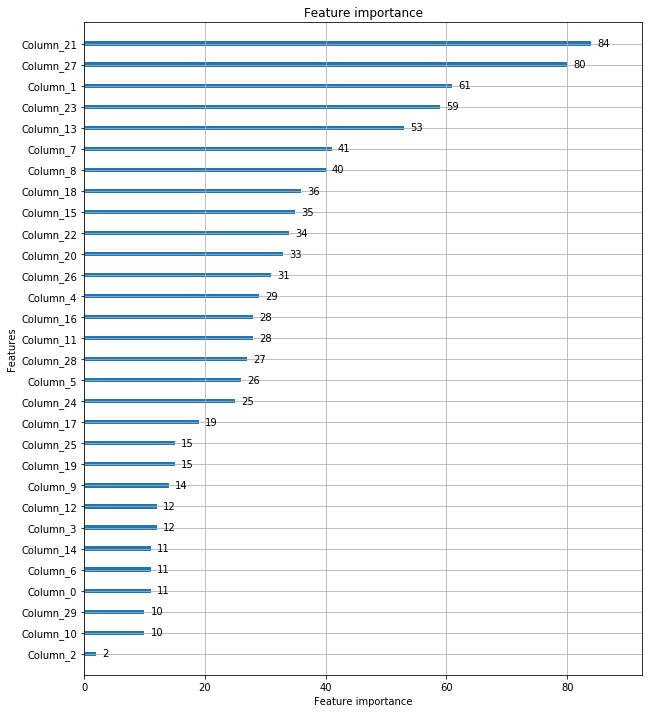

In [113]:
# 피처 중요도를 그래프로 출력
from lightgbm import plot_importance

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)